In [1]:
library(vegan)
library(ggplot2)

Loading required package: permute
Loading required package: lattice
This is vegan 2.5-6


## Import metadata and Aitchison distance matrix and merge

In [2]:
#uploading metadata (First Column might be "Sample.ID")
tab <- read.csv("../data/T1_SMDS_metadata_ms.txt", sep="\t",check.names=FALSE, stringsAsFactors=F)
head(tab)

#SampleID,study_acronym,experiment_name,participant_id,saliva_weight_g,saliva_volume_mL_collected_in_5_min,saliva_flow_rate_mL_per_min,FC_cells_per_ul_r1,FC_cells_per_ul_r2,FC_avg_cells_per_ul,...,qPCR_median_16S_copies_per_2ul_DNA,alcohol_since_last_sample,misc-notes,food,food notes,drink notes,self_reported_min_brushing,floss_regularly?,toothbrush_type,percent_reads_aligning_to_chloroplast_seqeuneces
A1.lyPMA,SMDS,daily dynamics,A,1.28,1.1,0.22,13268,12489,12879,...,5374744,none,none,no,none,none,3,yes,electric,0
A2.lyPMA,SMDS,daily dynamics,A,1.41,1.1,0.22,9742,10925,10334,...,102428,none,none,no,none,none,3,yes,electric,0
A3.lyPMA,SMDS,daily dynamics,A,2.10,1.9,0.38,1747,1723,1735,...,1228159,none,none,yes,donut,none,3,yes,electric,0
A4.lyPMA,SMDS,daily dynamics,A,1.62,1.4,0.28,5606,5553,5580,...,62065,none,none,yes,burrito and salsa,none,3,yes,electric,0
A5.lyPMA,SMDS,daily dynamics,A,1.64,1.2,0.24,6147,6242,6195,...,261920,none,none,no,none,none,3,yes,electric,0
A6.lyPMA,SMDS,daily dynamics,A,1.70,1.4,0.28,3548,3770,3659,...,1486204,none,none,no,none,none,3,yes,electric,0


In [5]:
#uploading the distance matrix
d <- read.table("../data/SMDS_aitchison_distance_matrix.tsv")
head(d)

,A1.lyPMA,A4.lyPMA,A1.raw,A2.lyPMA,A2.raw,A3.lyPMA,A3.raw,A4.raw,A5.lyPMA,A5.raw,...,J5.lyPMA,J5.raw,J6.lyPMA,J6.raw,J7.lyPMA,J7.raw,J8.lyPMA,J8.raw,J9.lyPMA,J9.raw
A1.lyPMA,0.00000,34.01311,14.83619,29.42491,29.98354,22.63864,23.10813,29.22210,21.04942,23.82291,...,45.43282,44.74729,47.05031,45.42940,49.50866,47.57099,48.05855,47.22863,52.09930,50.53989
A4.lyPMA,34.01311,0.00000,35.29570,36.56330,34.88564,24.85867,27.78792,25.61972,30.40339,30.73787,...,46.66836,48.80130,48.12201,49.40789,51.00674,50.84611,49.41843,52.02695,55.35564,53.49630
A1.raw,14.83619,35.29570,0.00000,30.43192,29.99540,25.02086,23.88733,28.62592,22.43309,23.85178,...,45.03034,44.27925,46.60544,45.17263,49.16354,47.22957,47.72719,47.18249,52.01586,50.46383
A2.lyPMA,29.42491,36.56330,30.43192,0.00000,19.91398,28.59131,30.07205,33.17774,35.56323,36.48272,...,53.59650,53.29750,54.13062,53.73759,57.40389,55.85425,56.42731,56.48122,58.10801,56.91803
A2.raw,29.98354,34.88564,29.99540,19.91398,0.00000,31.07925,29.37195,31.27173,35.73274,35.10658,...,52.53696,52.87648,53.04283,53.13303,55.77812,55.58860,54.70858,55.71911,58.39680,56.62090
A3.lyPMA,22.63864,24.85867,25.02086,28.59131,31.07925,0.00000,18.01161,23.47154,21.27281,22.64874,...,44.79436,45.28141,47.35768,46.81069,50.54836,48.29115,48.24717,48.78414,52.94827,51.43960


In [6]:
# need to make sure distance matrix and metadata are in same order!
tab = tab[match(rownames(d),tab$'#SampleID'),]

## Perform dimensionality reduction on the Aitchison distance matrix

In [7]:
# Perform PCoA
transf2 <- cmdscale(d, k=3, eig = TRUE)

In [8]:
#%Variance explained by axis
(transf2$eig/sum(transf2$eig))[1:5]

[1] 0.14015081 0.10755878 0.08971365 0.06799732 0.05801611

## Plot the two biggest PCoA axes

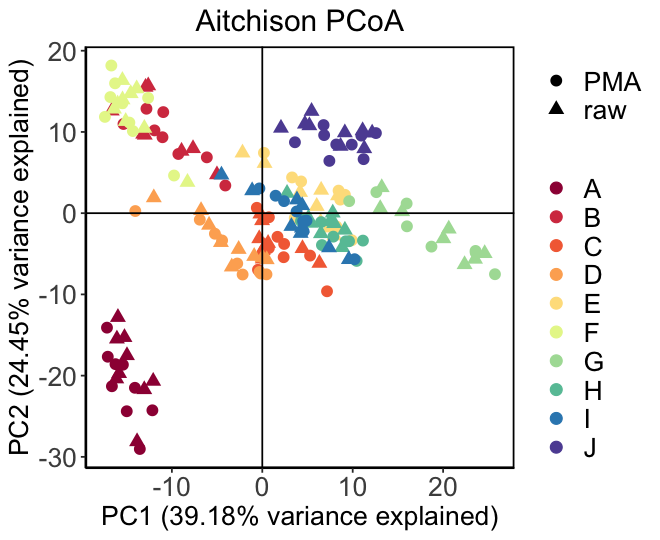

In [9]:
# Select a metadata column from your original matrix
clustid <- tab[,4]  #color by participant
shapeid <- tab[,12]  #shape by processing method
options(repr.plot.width=5.5, repr.plot.height=4.5)

#need check with Cristal the colors...
my_palette <- c('#9e0142', '#d53e4f', '#f46d43', '#fdae61', '#fee08b', '#e6f598', '#abdda4', '#66c2a5', '#3288bd', '#5e4fa2')


# to select different combinations of components do transf2$points[,c(1,3)]
transf3 <- as.data.frame(transf2$points[,c(1,2)])
colnames(transf3) <- c("Dim_1", "Dim_2")
p <- ggplot(transf3, aes(Dim_1, Dim_2, color=factor(clustid), shape=factor(shapeid)))
        p <- p + 
        geom_point(size = 3) + 
        scale_color_manual(values = my_palette) +
        geom_hline(yintercept=0) +
        geom_vline(xintercept=0) +
        labs(x ="PC1 (39.18% variance explained)", 
             y = "PC2 (24.45% variance explained)",
             title = "Aitchison PCoA") +
        theme_classic() +
        theme(legend.title=element_blank(), 
              panel.background = element_blank(),
              panel.border = element_rect(colour = "black", fill=NA, size=1),
              plot.title = element_text(hjust = 0.5, size=18),
              text = element_text(size=16),
              axis.text.x = element_text(size=16),
              axis.text.y = element_text(size=16),
              legend.text=element_text(size=16)
             )
print(p)